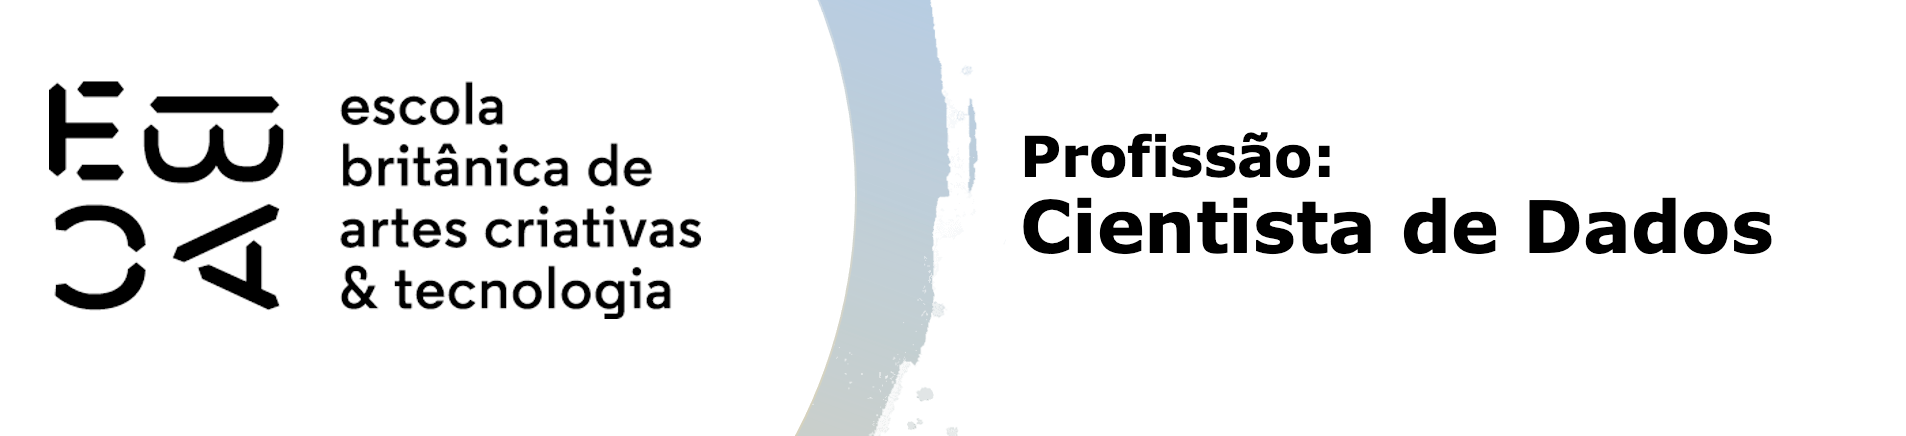

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

 _obs:_ variávels calculadas pelo google analytics.

In [591]:
#importando pacotes:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [592]:
#carregamento da base:
df = pd.read_csv('online_shoppers_intention.csv')

In [593]:
#exibição da base:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Percebmos no df acima que temos várias variáveis, mas como nosso objetivo nesse primeiro momento é nos atentarmos às seis primeiras, vamos criar um df com elas e dar a ele o nome de 'df_escopo':

In [595]:
df_escopo= df [['Administrative', 'Administrative_Duration',
              'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration']]
df_escopo.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
0,0,0.0,0,0.0,1,0.000000
1,0,0.0,0,0.0,2,64.000000
2,0,0.0,0,0.0,1,0.000000
3,0,0.0,0,0.0,2,2.666667
4,0,0.0,0,0.0,10,627.500000


Se você abrir o link disponibilizado no inicio do df, verá que ele traz a informação de que não há valores faltantes no nosso df, logo, podemos continuar nossa análise.

## Análise descritiva

Faremos uma análise descritiva das variáveis do escopo.

- Verificação da distribuição dessas variáveis;
- Padronização do dados.

In [598]:
df_escopo.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230


A análise da tabela acima revela alguns padrões importantes:

**Média de Acessos:** O acesso médio a páginas de produtos (31,7) é significativamente superior aos demais tipos, reforçando que os usuários tendem a navegar mais nessas páginas. A média de páginas administrativas é 2,3 (13x menor que a anteior), enquanto as informativas ficam abaixo de 1.

**Distribuição dos Acessos:**

- _Páginas Administrativas:_ 25% das sessões não incluem acessos a essas páginas, e a mediana é 1, sugerindo que muitos usuários acessam poucas vezes ou nenhuma.
- _Páginas Informativas:_ 75% das sessões sequer acessam esse tipo de página, com muitos usuários ignorando-as por completo.
- _Páginas de Produtos:_ Há registros em todos os quartis, indicando uso mais consistente entre os usuários, o que pode significar maior interesse nas informações de produtos.

**Duração dos Acessos:** Os tempos de navegação variam amplamente, com valores médios mais altos nas páginas de produtos, que podem sinalizar um interesse prolongado.




Para dar sequência à nossa análise, vamos padronizar os dados, uma vez que padronizar ajuda a colocar todas as variáveis em uma escala semelhante, o que permite que o algoritmo trate cada característica de maneira equilibrada, levando a agrupamentos mais representativos.

In [601]:
# Instancia o StandardScaler
padronizador = StandardScaler()
# Aplica a padronização
df_esc_pad = pd.DataFrame(padronizador.fit_transform(df_escopo), columns=df_escopo.columns)

Agora com os dados padronizados, vamos fazer o plot:

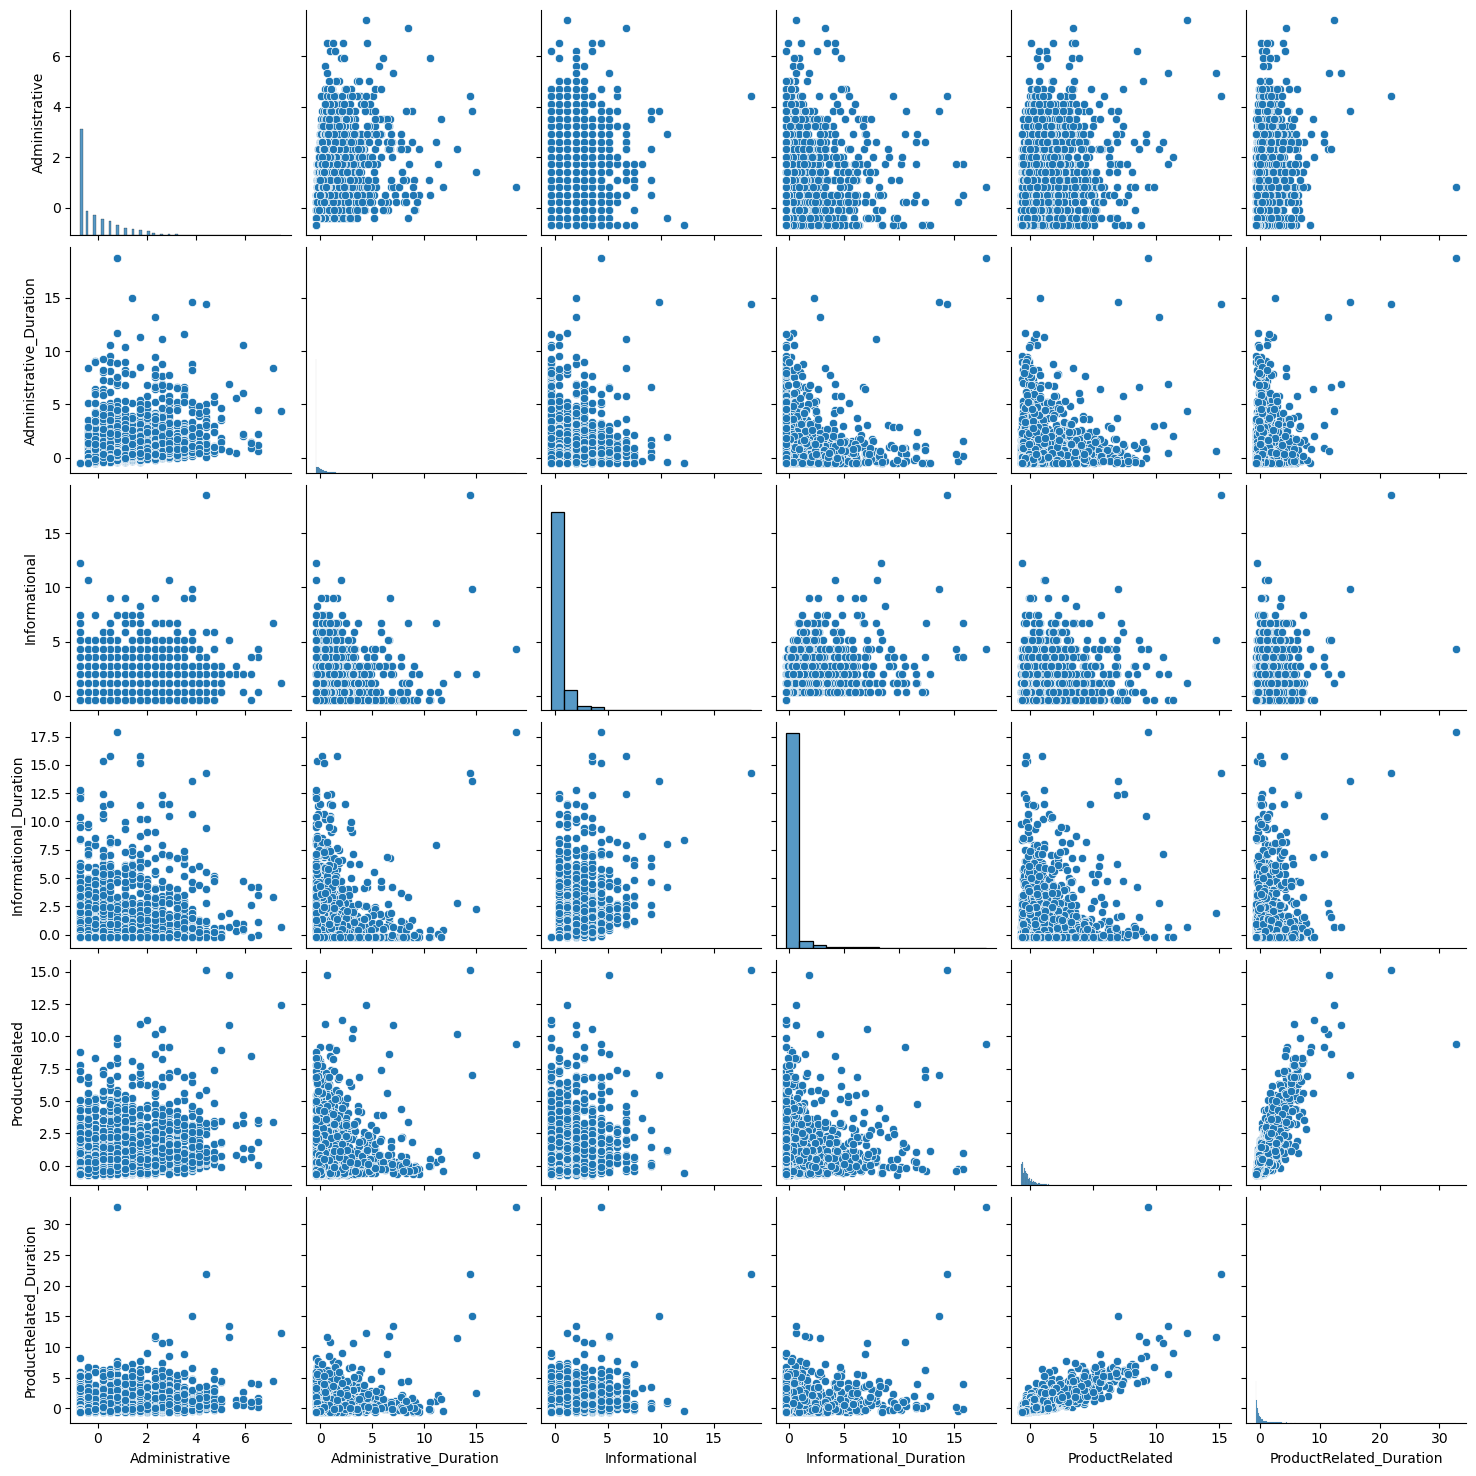

In [603]:
sns.pairplot(df_esc_pad)

Observando os dados assim não é possível identificar diferentes grupos de dados justamente por todos os pontos estarem muito próximos e serem todos da mesma cor. 

Utilizando o k-means nós poderiamos criar grupos que classificariam os dados de acordo com suas características em comum e assim poderiamos ver os dados acima coloridos.

Para utilizarmos o Kmeans, precisamos definir o número de clusters (grupos) que queremos criar. Para facilitar a nossa escolha podemos criar uma lista e assim verificar qual quantidade de grupos se sai melhor. 

## Definindo a Quantidade de Grupos:

Para definir o número ideal de clusters para o k-means, vamos criar uma lista com o intervalo de valores que queremos testar. Para iterar sobre esses valores utilizaremos dois métodos: do cotovelo e da silhueta.

Iremos começar com o método do cotovelo.

### Método do Cotovelo:

De maneira geral, quanto menor a inércia, melhor o ajuste dos clusters aos dados. A inércia, ou soma das distâncias ao quadrado (SQD), mede a compacidade dos clusters: quanto menor for esse valor, mais próximos os pontos estão dos centróides de seus respectivos clusters, indicando clusters mais bem definidos.

*No entanto, à medida que aumentamos o número de clusters (k), a inércia tende a diminuir, pois os pontos ficam mais próximos dos centróides. Isso não significa necessariamente uma melhoria real, pois um k muito grande pode resultar em clusters menos úteis ou significativos, eventualmente chegando ao ponto em que cada ponto está em seu próprio cluster e a inércia é zero.*

**Para determinar o número ideal de clusters, o método do cotovelo é usado. Nesse método, o ponto onde a redução na inércia começa a diminuir (o "cotovelo") indica um bom equilíbrio entre a compacidade dos clusters e a simplicidade do modelo.**


In [608]:
SQD = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_esc_pad)
    SQD.append(km.inertia_)

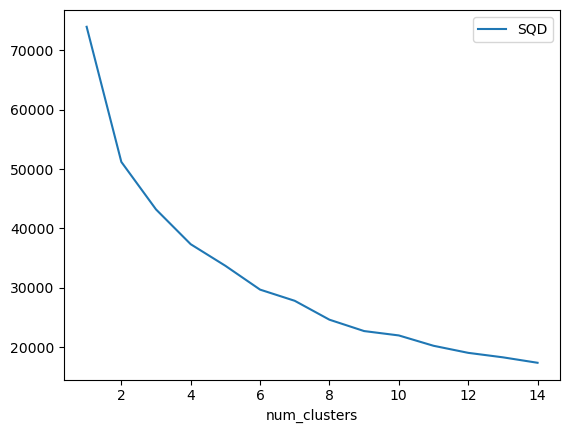

In [609]:
df_1 = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_1.plot(x = 'num_clusters', y = 'SQD');

Pelo método do cotovelo a gente consegue perceber uma alta queda na inércia de 1 para 2 clusters, depois disso a distância entre a inércia atual e do ponto anterior e atual vai reduzindo cada vez mais. *A escolha através da análise do gráfico é bem intuitiva e varia de acordo com a pessoa que faz a análise.*

*Mas* existe um método que ajuda a determinar o número ideal de clusters localizando o ponto de "cotovelo", onde a redução na soma dos quadrados das distâncias começa a desacelerar rapidamente, indicando que adicionar mais clusters não trará melhorias significativas no ajuste do modelo. Vamos utilizar esse método abaixo, que nos retornará o gráfico acima com o 'corte' desejado.

Número ideal de clusters (cotovelo) é: 2


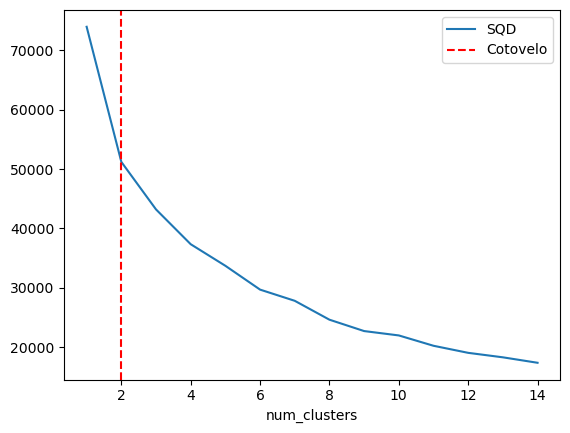

In [611]:
# Cálculo da primeira derivada (diferença entre valores consecutivos)
primeira_derivada = np.diff(SQD)

# Cálculo da segunda derivada (diferença entre valores consecutivos da primeira derivada)
segunda_derivada = np.diff(primeira_derivada)

# Encontrando o índice onde ocorre a maior mudança (máximo valor da segunda derivada)
indice_cotovelo = np.argmax(segunda_derivada) + 1  # +1 pois estamos lidando com diferenças

print("Número ideal de clusters (cotovelo) é:", indice_cotovelo + 1)  # +1 para ajustar à escala original

# Plotando o gráfico e destacando o ponto do cotovelo
df_1.plot(x='num_clusters', y='SQD')
plt.axvline(x=indice_cotovelo + 1, color='r', linestyle='--', label='Cotovelo')
plt.legend()
plt.show()

Como já observado anteriormente, há uma queda brusca do SQD de 1 para 2 clusters e foi esse justamente o ponte de corte que o método acima sugeriu. Logo, aqui ficaremos com 2 clusters.

#### Gráfico com 2 clusters:

In [614]:
#definindo número de clusters
kmeans2 = KMeans(n_clusters=2, random_state=42)
#ajustando o modelo:
kmeans2.fit_predict(df_esc_pad)

array([0, 0, 0, ..., 0, 0, 0])

In [615]:
#criando a coluna grupos no X_pad onde cada ponto de dados possui o rótulo do cluster (valor numérico) ao qual foi atribuído.
df_esc_pad['grupos_2_clusters'] = pd.Categorical(kmeans2.labels_)
df_esc_pad.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,grupos_2_clusters
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,0


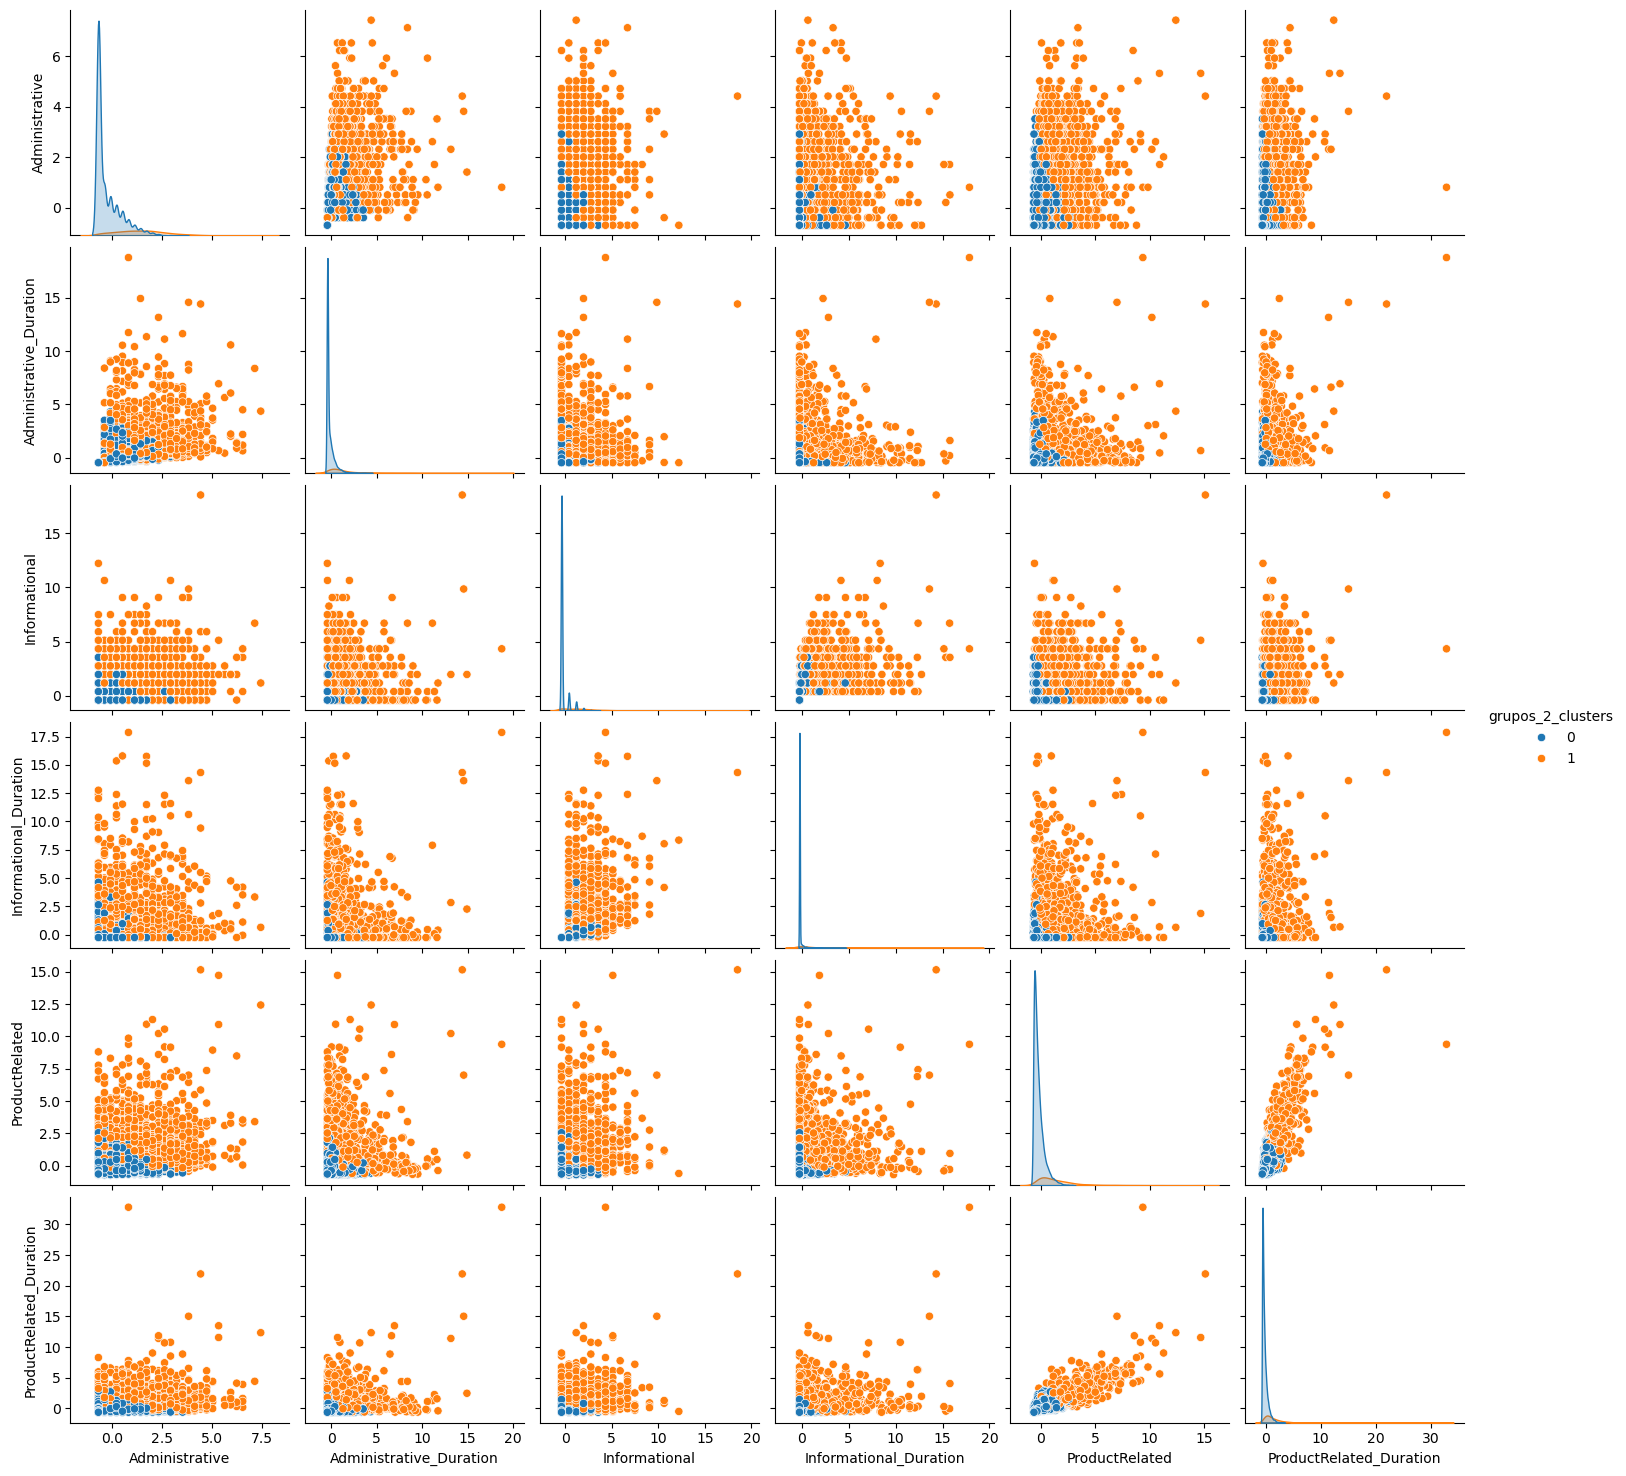

In [616]:
sns.pairplot(df_esc_pad, hue='grupos_2_clusters')

Agora que temos o gráfico acima no qual os pontos estão coloridos de acordo com os grupos, é possível identificar que existe sim características em comum que merecem agrupamento. 

*Mas como dito anteriormente, esse método tende a ser algo mais intuítivo e por isso, iremos utilizar 3 agrupamentos diferentes apenas para observação.*

#### Método do Cotovelo com 3 clusters:

In [619]:
#definindo número de clusters:
kmeans3 = KMeans(n_clusters=3, random_state=42)
#ajustando o modelo:
kmeans3.fit_predict(df_esc_pad)

array([0, 0, 0, ..., 0, 0, 0])

In [620]:
#criando a coluna grupos no X_pad onde cada ponto de dados possui o rótulo do cluster (valor numérico) ao qual foi atribuído.
df_esc_pad['grupos_3_clusters'] = pd.Categorical(kmeans3.labels_)

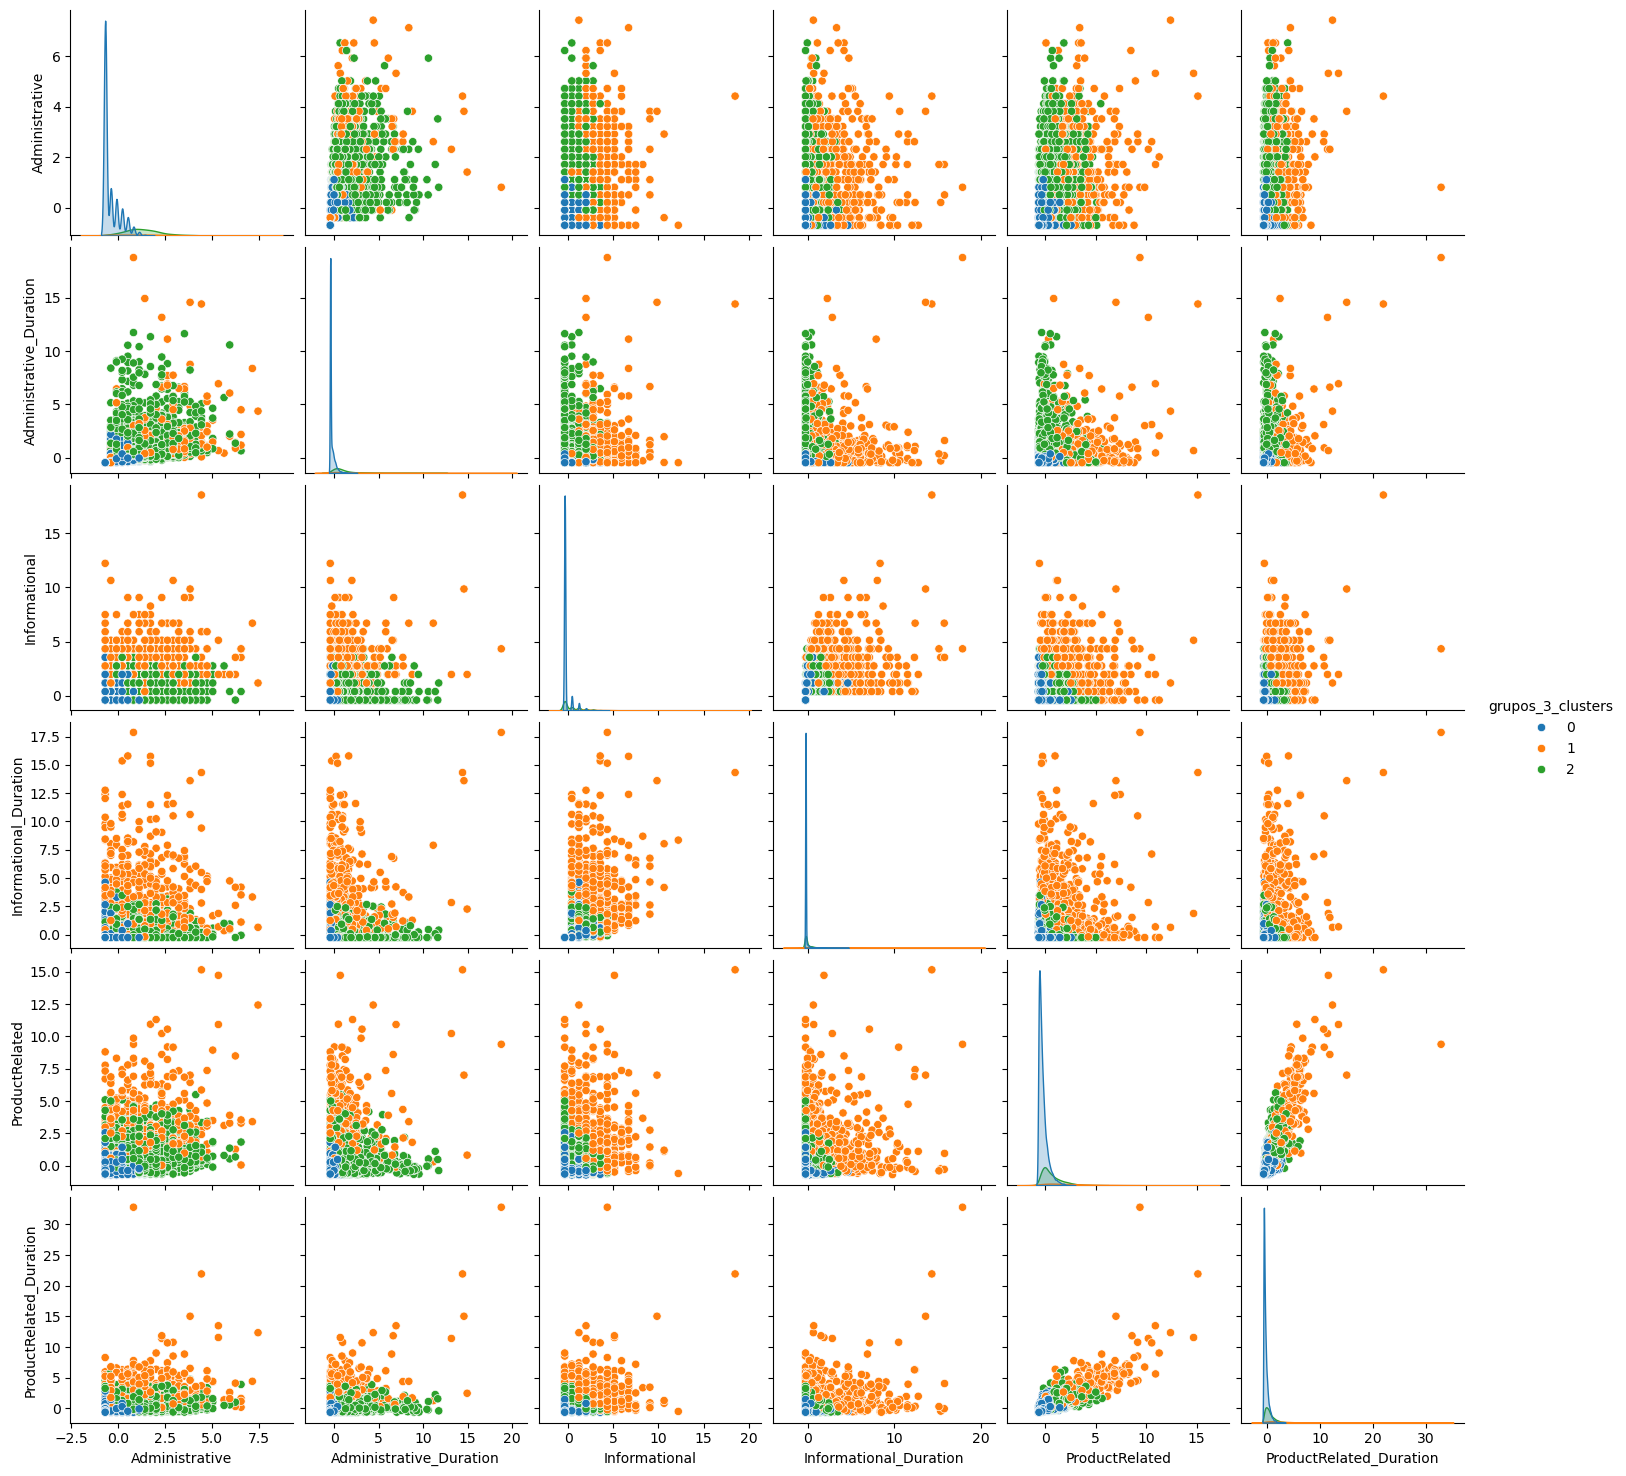

In [621]:
#plot:
sns.pairplot(df_esc_pad, hue='grupos_3_clusters')

Podemos ver no gráfico acima que dá para ter três grupos mas que o 0 e 1 estão sempre bem próximos, talvez podendo se tornar apenas 1, como a sugestão dada pelo método testado acima, mas continuaremos com a análise para ver se essa será a decisão final.

Agora ficaremos com o método da silhueta.

---

### Método da Silhueta:

Esse método mede o quão bem um objeto está agrupado em relação aos outros grupos, ajudando a determinar se o número de clusters escolhido é o mais apropriado para os dados.

*Cálculo do Coeficiente de Silhueta:*

Para cada ponto \( i \), o coeficiente de silhueta \( s(i) \) é calculado com a fórmula:

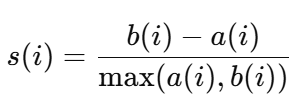

Onde:
- \( a(i) \) é a **distância média** entre o ponto \( i \) e todos os outros pontos do mesmo cluster.
- \( b(i) \) é a **menor distância média** entre o ponto \( i \) e os pontos do cluster mais próximo ao qual ele **não** pertence (o segundo melhor cluster).

*Interpretação do Coeficiente*
- **\( s(i) \) varia entre -1 e 1**:
  - Valores próximos de **1** indicam que o ponto está bem agrupado.
  - Valores próximos de **0** indicam que o ponto está próximo da fronteira entre clusters.
  - Valores **negativos** indicam que o ponto pode estar mal agrupado, sugerindo que ele pode pertencer a outro cluster.

A **média dos coeficientes de silhueta** de todos os pontos no conjunto de dados fornece uma medida geral da qualidade da clusterização. Quanto mais alta a média, melhor é o agrupamento.

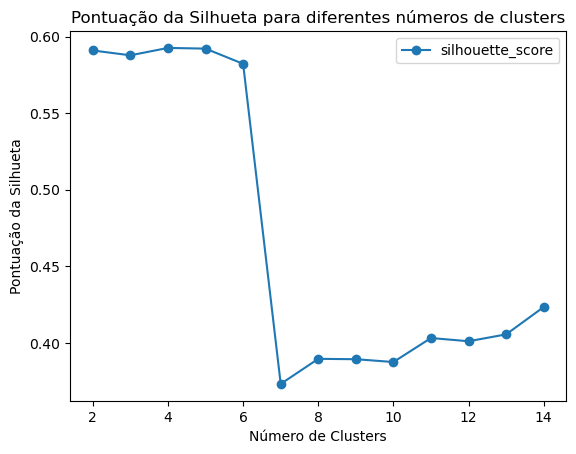

Número ideal de clusters pela silhueta: 4


In [626]:
#lista:
silhouette_scores = []

# Testando diferentes quantidades de clusters
for k in range(2, 15):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(df_esc_pad)
    score = silhouette_score(df_esc_pad, labels)
    silhouette_scores.append(score)

# Criando um DataFrame com os resultados
df_silhouette = pd.DataFrame({'num_clusters': list(range(2, 15)), 'silhouette_score': silhouette_scores})

# Plotando o gráfico da pontuação da silhueta
df_silhouette.plot(x='num_clusters', y='silhouette_score', marker='o')
plt.title('Pontuação da Silhueta para diferentes números de clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()

# Melhor número de clusters com a maior pontuação de silhueta
melhor_k = df_silhouette['silhouette_score'].idxmax() + 2  # +2 para alinhar com o índice de clusters começando em 2
print("Número ideal de clusters pela silhueta:", melhor_k)


**Método da silhueta:** 2 grupos.

Já plotamos o gráfico com 2 grupos anteriormente, por isso, não o faremos novamente. 

Agora, iremos avaliar as quantidades de grupos encontradas até para ver qual se sai melhor. Temos 2 e 3 grupos, então vamos lá.

### Avaliação dos grupos:

Para dar inicio à essa avaliação, iremos criar uma crosstab que revela uma média do perfil comportamental dos clientes dentro de cada grupo.

In [630]:
# Usando groupby para calcular a média de cada variável dentro de cada grupo
tabela_crosstab = df_esc_pad.groupby('grupos_2_clusters', observed=False)[['Administrative', 'Administrative_Duration', 
                                                 'Informational', 'Informational_Duration', 
                                                 'ProductRelated', 'ProductRelated_Duration']].mean()

# Exibindo a tabela cruzada
print("Tabela Cruzada de Variáveis por Grupo:")
display(tabela_crosstab)

Tabela Cruzada de Variáveis por Grupo:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
grupos_2_clusters,,,,,,
0,-0.247032,-0.207952,-0.247838,-0.194928,-0.233126,-0.218679
1,1.491500,1.255548,1.496365,1.176914,1.407538,1.320312


O **Grupo 1** parece ser composto por usuários ou **clientes que estão mais ativos** e engajados em atividades administrativas, informativas e relacionadas a produtos.

O **Grupo 0** pode ser composto por **usuários que têm um envolvimento mais baixo** com essas atividades.

*Vejamos o que nos revela crosstab com 3 grupos:*

In [632]:
# Usando groupby para calcular a média de cada variável dentro de cada grupo
tabela_crosstab = df_esc_pad.groupby('grupos_3_clusters', observed=False)[['Administrative', 'Administrative_Duration', 
                                                 'Informational', 'Informational_Duration', 
                                                 'ProductRelated', 'ProductRelated_Duration']].mean()

# Exibindo a tabela cruzada
print("Tabela Cruzada de Variáveis por Grupo:")
display(tabela_crosstab)

Tabela Cruzada de Variáveis por Grupo:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
grupos_3_clusters,,,,,,
0,-0.403596,-0.307555,-0.267582,-0.199518,-0.281034,-0.258311
1,1.385970,1.018839,2.833407,3.036816,2.372377,2.344776
2,1.327140,1.020575,0.405649,0.073553,0.575526,0.488312


**Grupo 0: Baixo engajamento** em todas as áreas, indicando uma necessidade de estratégias para aumentar o interesse e a interação. Esse grupo pode ser um desafio em termos de conversão.

**Grupo 1: Altamente engajado**, especialmente em informações e produtos. Este grupo tem alta probabilidade de conversão, apresentando-se como um alvo ideal para campanhas de marketing que destacam produtos e informações relevantes.

**Grupo 2: Moderadamente engajado** em atividades administrativas, informacionais e relacionadas a produtos. Possui potencial para conversão, necessitando de incentivos e abordagens mais diretas.



Podemos renomear esses grupos 0, 1 e 2 para *baixo, médio e alto engajamento*, enquanto que os grupos 0 e 1 para 2 clusters, podemos renomear como *menor e maior engajamento*.

In [674]:
# Criando o dicionário de mapeamento para grupo_3_clusters
mapeamento = {0: 'baixo engajamento', 1: 'alto engajamento', 2: 'médio engajamento'}

# Aplicando o mapeamento à coluna 'grupos_3_clusters'
df_esc_pad['grupos_3_clusters'] = df_esc_pad['grupos_3_clusters'].map(mapeamento)

# Criando o dicionário de mapeamento para grupo_2_clusters
mapeamento = {0: 'menor engajamento', 1: 'maior engajamento'}

# Aplicando o mapeamento à coluna 'grupos_3_clusters'
df_esc_pad['grupos_2_clusters'] = df_esc_pad['grupos_2_clusters'].map(mapeamento)


---

Agora que realizamos a avaliação do perfil comportamental de engajamento de cada grupo, vamos obversar como se saem esses grupos de acordo com as variáveis *bounce rate* e *revenue*.

## Avaliação de resultados

Para fazer uma avaliaçãp dos resultados, precisamos saber o que exatamente queremos avaliar. No nosso caso é como os grupos se comportam em relação às duas variáveis citadas acima: *bounce rate* e *revenue*. 

Então temos aqui duas perguntas para responder: 
- Qual grupo possui maior taxa de rejeição (bounce_rate)?
- Qual grupo possui clientes realiza mais compras (Revenue)?

In [637]:
# Atribuindo as colunas de Revenue e bounce_rate de df para df_esc_pad
df_esc_pad['Revenue'] = df['Revenue']
df_esc_pad['bounce_rate'] = df['BounceRates']

Agora que adicionamos as variáveis que queremos observar no nosso df_esc_pad, vamos utilizar um groupby.mean() para termos o retorno do comportamento das duas variáveis em cada grupo definido nas nossas técnicas de clustering:

#### Número de Clusters: 2

In [676]:
#groupby.mean() revenue e bounce_rate para 2 clusters:
avaliacao_resultados = df_esc_pad.groupby('grupos_2_clusters', observed=False)[['bounce_rate', 'Revenue']].mean()

# Exibindo a tabela de avaliação
print("Avaliação de Grupos em Relação ao Bounce Rate e Revenue:")
display(avaliacao_resultados)

Avaliação de Grupos em Relação ao Bounce Rate e Revenue:


,bounce_rate,Revenue
grupos_2_clusters,,
menor engajamento,0.024793,0.135092
maior engajamento,0.006483,0.273402


**Grupo menor engajamento:** *Apresenta uma taxa de rejeição muito maior que a do grupo 1, o que significa que não passam muito tempo nos sites e consequentemente, não realizam um número grande de compras.* Provavelmente esse grupo não está sendo atingido positivamente pelas estratégias utilizadas pelos sites, o que significaria que está na hora de entender o motivo dessa rejeição e trabalhar para mudar esse cenário. 

**Grupo maior engajamento:** *Apresenta uma taxa de rejeição muito baixa, indicando que os visitantes desse cluster interagem bastante com as páginas e consequentemente acabam consumindo o produto delas, fazendo com que a receita seja alta.*

#### Número de Clusters: 3

In [678]:
#groupby.mean() revenue e bounce_ratepara 3 clusters:
avaliacao_resultados = df_esc_pad.groupby('grupos_3_clusters', observed=False)[['bounce_rate', 'Revenue']].mean()

# Exibindo a tabela de avaliação
print("Avaliação de Grupos em Relação ao Bounce Rate e Revenue:")
display(avaliacao_resultados)

Avaliação de Grupos em Relação ao Bounce Rate e Revenue:


,bounce_rate,Revenue
grupos_3_clusters,,
baixo engajamento,0.026892,0.125818
alto engajamento,0.006811,0.308642
médio engajamento,0.006544,0.236348


**Grupo baixo engajamento:** *Maior taxa de rejeição e a menor receita*. Isso indica que os visitantes desse cluster tendem a sair do site rapidamente sem realizar transações. O conteúdo ou a experiência do site para esse grupo não é o relevante o suficiente. Talvez seja necessário focar em outras estratégias para atingir esse público e melhorar a sua experiência.

**Grupo alto engajamento:** *Taxa de rejeição baixa e a maior receita entre os três grupos*. Os visitantes desse cluster são altamente engajados e geram a maior parte da receita. Isso pode indicar que as características desse grupo são as mais alinhadas com o conteúdo ou a oferta do site e portanto, deve-se manter os elementos já utilizados.

**Grupo médio engajamento:** *Taxa de rejeição baixa e uma receita moderada*. Isso sugere que os visitantes desse cluster estão engajados com o site e há um bom nível de conversão, mas não o mais alto entre os três grupos. Talvez aqui seja possível otimizar ainda mais os resultados através de mudaças simples mas significativas. 

#### Conclusão:

A impressão que dá ao utilizar 2 e 3 clusters é que ao utilizar 2 você tem menor e maior enganjamento e ao usar três, o maior engajamento é dividido em dois grupos, tornando-se o médio e alto engajamento. 

_As duas estratégias retornam bons resultados, mas aparentemente, utilizando 3 clusters é possível perceber que o grupo médio engajamento é passível de algumas mudanças para fazer parte do alto engajamento._

_E nas duas análises é possível perceber que o grupo com baixo engajamento não está sendo conquistado pela experiência e por isso, deve-se investigar conhecer mais sobre esses usuários para então encantá-los e conquistá-los._

Fim!